## Q-learning 
(3 points)

This notebook will guide you through implementation of vanilla Q-learning algorithm.

You need to implement QLearningAgent (follow instructions for each method) and use it on a number of tests below.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1
        
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Try it on taxi

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

In [27]:
from IPython.display import clear_output

def play_and_train(env, agent, t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.get_action(s)
        next_s, r, done, _ = env.step(a)
        agent.update(s, a, r, next_s)
        s = next_s
        total_reward +=r
        if done: 
            break
    return total_reward

def check_agent(agent, n_games=1000, eps_decay=0.99, verbose=100):
    rewards = []
    for i in range(n_games):
        rewards.append(play_and_train(env, agent))
        agent.epsilon *= eps_decay
        if i%verbose == 0:
            clear_output(True)
            print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
            plt.plot(rewards)
            plt.show()
    return rewards

eps = 2.9191091959171894e-05 mean reward = 9.4


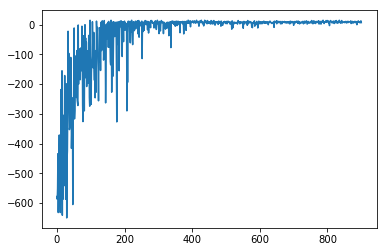

In [8]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99, get_legal_actions = lambda s: range(n_actions))
check_agent(agent)

# Binarized state spaces

Use agent to train efficiently on CartPole-v0.
This environment has a continuous set of possible states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
first state:[-0.03268301 -0.00113764  0.04134335 -0.00928424]


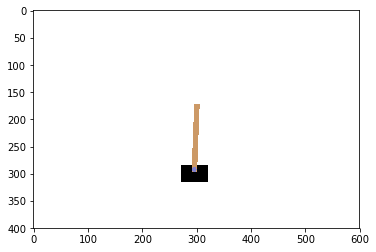

In [9]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s" % (env.reset()))
plt.imshow(env.render('rgb_array'))

### Play a few games

We need to estimate observation distributions. To do so, we'll play a few games and record all states.

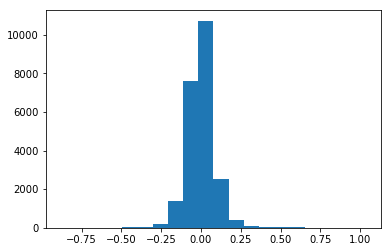

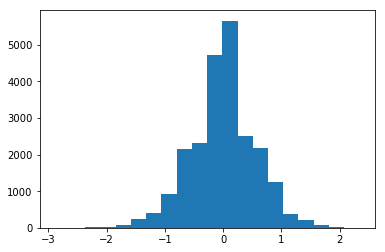

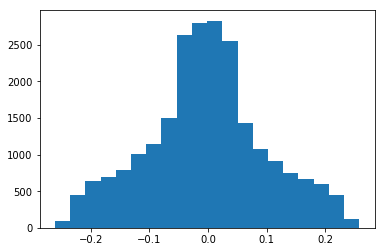

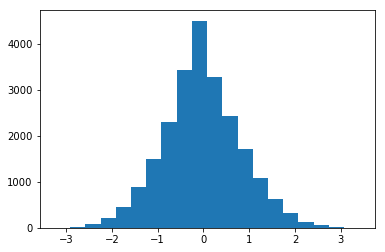

In [10]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done: 
            break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

## Binarize environment

In [31]:
from gym.core import ObservationWrapper

class Binarizer(ObservationWrapper):
    def _observation(self, state):    
        cp, cv, pa, pv = state
        state = round(cp, 1), round(cp, 1), round(pa, 2), round(pv, 1)
        return state

In [80]:
# env = gym.make("CartPole-v0")
# env.reset()
# s, r, done, _ = env.step(env.action_space.sample())

# cp, cv, pa, pv = s
# round(cp, 3), round(cp, 1), round(pa, 4), round(pv, 1)

In [32]:
env = Binarizer(gym.make("CartPole-v0"))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


WARN: <class '__main__.Binarizer'> doesn't implement 'observation' method. Maybe it implements deprecated '_observation' method.


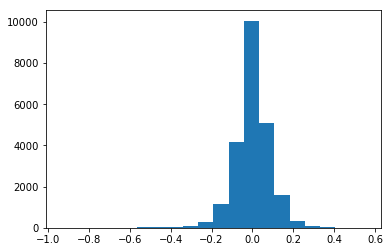

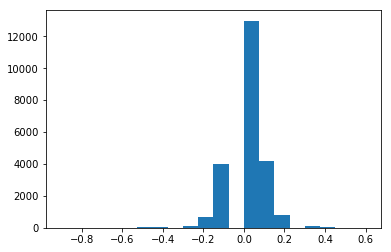

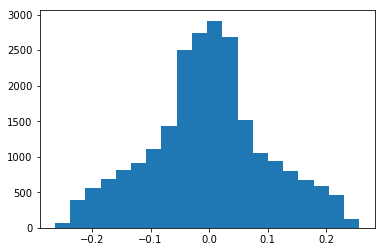

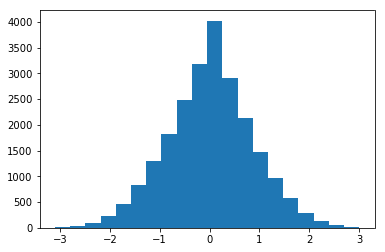

In [13]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done: break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i], bins=20)
    plt.show()

## Learn binarized policy

Now let's train a policy that uses binarized state space.

__Tips:__ 
* If your binarization is too coarse, your agent may fail to find optimal policy. In that case, change binarization. 
* If your binarization is too fine-grained, your agent will take much longer than 1000 steps to converge. You can either increase number of iterations and decrease epsilon decay or change binarization.
* Having 10^3 ~ 10^4 distinct states is recommended (`len(QLearningAgent._qvalues)`), but not required.
* A reasonable agent should get to an average reward of >=50.

eps = 3.0683120859595536e-05 mean reward = 152.2


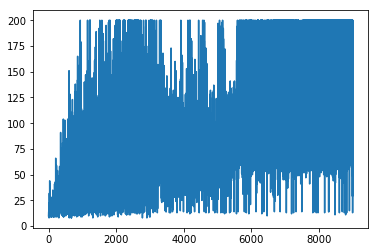

In [33]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99, get_legal_actions = lambda s: range(n_actions))

rewards = check_agent(agent, n_games=10000, eps_decay=0.999, verbose=1000)

### Чему агент научился

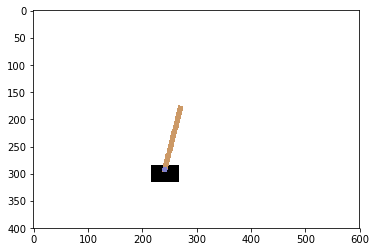

In [37]:
agent.epsilon = 0
s = env.reset()

for t in range(10**4):
    clear_output(True)
    a = agent.get_action(s)
    s, r, done, _ = env.step(a)
    plt.imshow(env.render('rgb_array'))
    if done: 
        break